# Assignment 4

## Mark Haskins

### Importing Libraries

In [266]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import completeness_score, homogeneity_score
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pylab as pl
from sklearn import decomposition
import matplotlib
import matplotlib.pyplot as plt
from numpy import *
from numpy import linalg as la

### Problem 1a

#### Load in the image data matrix (with rows as images and columns as features)

In [248]:
data = pd.read_csv("segmentation_data.txt", header=None)
X = np.mat(data)
X

matrix([[110.  , 189.  ,   9.  ,   0.  ,   0.  , ..., -11.11,  17.22,  18.67,   0.51,   1.91],
        [ 86.  , 187.  ,   9.  ,   0.  ,   0.  , ..., -10.22,  16.44,  19.22,   0.46,   1.94],
        [225.  , 244.  ,   9.  ,   0.  ,   0.  , ...,  -8.78,  14.56,  17.11,   0.48,   1.99],
        [ 47.  , 232.  ,   9.  ,   0.  ,   0.  , ..., -11.11,  16.22,  18.11,   0.5 ,   1.88],
        [ 97.  , 186.  ,   9.  ,   0.  ,   0.  , ..., -11.44,  16.56,  21.11,   0.44,   1.86],
        ...,
        [ 32.  , 158.  ,   9.  ,   0.  ,   0.  , ...,  11.78,  -6.89,  11.89,   0.52,  -1.98],
        [  8.  , 162.  ,   9.  ,   0.11,   0.  , ...,  10.89,  -5.78,  12.  ,   0.48,  -2.04],
        [128.  , 161.  ,   9.  ,   0.  ,   0.  , ...,  11.22,  -6.44,  10.89,   0.54,  -2.  ],
        [150.  , 158.  ,   9.  ,   0.  ,   0.  , ...,  11.33,  -7.  ,  12.22,   0.5 ,  -1.94],
        [124.  , 162.  ,   9.  ,   0.11,   0.  , ...,  13.56,  -7.44,  14.56,   0.48,  -2.03]])

#### Load in the numeric class labels from the segmentation class file

In [249]:
classes = pd.read_csv("segmentation_classes.txt", sep='\t', header = None)
#drop terms so matrix
classes.drop([0], axis=1, inplace=True)
#reindex
classes.columns= range(1)
#convert to array
y = np.array(classes[0])
y

array([0, 0, 0, 0, 0, ..., 3, 3, 3, 3, 3], dtype=int64)

#### Perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range

In [250]:
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
#convert array back to matrix
#X = np.mat(scaled_data) - not needed 
scaled_data

array([[0.43, 0.74, 0.  , 0.  , 0.  , ..., 0.01, 0.87, 0.12, 0.51, 0.83],
       [0.34, 0.73, 0.  , 0.  , 0.  , ..., 0.02, 0.86, 0.13, 0.46, 0.84],
       [0.89, 0.97, 0.  , 0.  , 0.  , ..., 0.04, 0.83, 0.11, 0.48, 0.84],
       [0.18, 0.92, 0.  , 0.  , 0.  , ..., 0.01, 0.86, 0.12, 0.5 , 0.83],
       [0.38, 0.73, 0.  , 0.  , 0.  , ..., 0.01, 0.86, 0.14, 0.44, 0.82],
       ...,
       [0.12, 0.61, 0.  , 0.  , 0.  , ..., 0.26, 0.46, 0.08, 0.52, 0.18],
       [0.03, 0.63, 0.  , 0.33, 0.  , ..., 0.25, 0.48, 0.08, 0.48, 0.17],
       [0.5 , 0.62, 0.  , 0.  , 0.  , ..., 0.25, 0.47, 0.07, 0.54, 0.18],
       [0.59, 0.61, 0.  , 0.  , 0.  , ..., 0.25, 0.46, 0.08, 0.5 , 0.18],
       [0.49, 0.63, 0.  , 0.33, 0.  , ..., 0.28, 0.45, 0.1 , 0.48, 0.17]])

### Problem 1b

#### Using the Kmeans implementation in scikit-learn to perfrom clustering on the image data. Using K = 7 


In [251]:
kmeans = KMeans(n_clusters=4, max_iter=500, verbose=1)
kmeans.fit(scaled_data)

Initialization complete
Iteration 0, inertia 828.4692625725611
Iteration 1, inertia 597.7496390746564
Iteration 2, inertia 547.1583238980877
Iteration 3, inertia 499.45316841370743
Iteration 4, inertia 489.5090076359601
Iteration 5, inertia 487.18164846594306
Iteration 6, inertia 486.8872064231331
Iteration 7, inertia 486.85923753444695
Iteration 8, inertia 486.85474128903803
Converged at iteration 8: center shift 1.061765356933183e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 913.9020601648099
Iteration 1, inertia 625.7053410114313
Iteration 2, inertia 613.8954371941977
Iteration 3, inertia 608.046968276318
Iteration 4, inertia 601.9277495969691
Iteration 5, inertia 593.0226254643998
Iteration 6, inertia 579.9281548532483
Iteration 7, inertia 564.7864602200043
Iteration 8, inertia 544.2557975053934
Iteration 9, inertia 508.45692995333525
Iteration 10, inertia 488.3686943590167
Iteration 11, inertia 486.87020961258713
Iteration 12, inertia 486

KMeans(max_iter=500, n_clusters=4, verbose=1)

#### Print the cluster centroids 

In [252]:
names = pd.read_csv("segmentation_names.txt", header=None)
clusters = kmeans.predict(scaled_data)
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=names)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.53,0.78,0.00,0.07,0.00,0.05,0.00,0.04,0.00,0.10,0.08,0.08,0.13,0.70,0.09,0.79,0.12,0.37,0.85
1,0.53,0.53,0.00,0.04,0.04,0.11,0.01,0.10,0.01,0.33,0.31,0.39,0.29,0.56,0.49,0.28,0.39,0.30,0.16
2,0.43,0.41,0.00,0.04,0.02,0.05,0.01,0.04,0.00,0.07,0.06,0.09,0.05,0.76,0.26,0.44,0.09,0.62,0.20
3,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13


#### Compute Silhouette values for all instances in the data

In [253]:
silhouettes = metrics.silhouette_samples(scaled_data, clusters)
silhouettes

array([0.54, 0.53, 0.51, 0.49, 0.54, ..., 0.41, 0.33, 0.43, 0.39, 0.33])

#### Compute the overall mean Silhouette value

In [254]:
silhouettes.mean()

0.38160981543092376

In [255]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

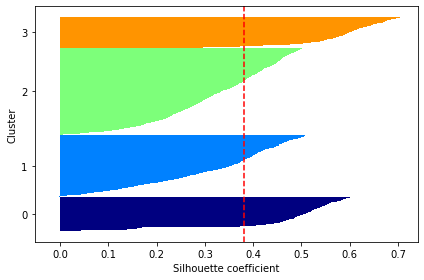

In [256]:
plot_silhouettes(scaled_data, clusters)


#### Compute Completeness and Homogeneity scores. The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.


In [257]:
c = completeness_score(y,clusters)
print("Completeness Score: " + str(c))
h = homogeneity_score(y,clusters)
print("Homogeneity Score: " + str(h))

Completeness Score: 0.8399857755070812
Homogeneity Score: 0.5594575369803793


### Problem 1c

#### After substiniuting different values of K, I see that the mean Silhouette score, 0.3816, is highest when K=4. Because this value is closest to +1 this is indicating that the sample is far away from the neighboring cluster, so the sample is least likely to be assigned to the wrong cluster. Also, after visually the Silhouette plot, I can see that the thickness is roughly the same for all clusters when K = 4. 

### Problem 1d 

#### Perform PCA on the normalized image data matrix using scikit-learn decomposition moduel

In [258]:
pca = decomposition.PCA()
scaled_data_trans = pca.fit(scaled_data).transform(scaled_data)
np.set_printoptions(precision=2,suppress=True, edgeitems=5, linewidth=120)
scaled_data_trans

array([[-0.69,  0.53,  0.25, -0.2 , -0.08, ...,  0.  ,  0.  , -0.  ,  0.  , -0.  ],
       [-0.67,  0.51,  0.34, -0.17, -0.04, ..., -0.  , -0.  ,  0.  , -0.  , -0.  ],
       [-0.71,  0.77, -0.16, -0.01, -0.17, ..., -0.  , -0.  ,  0.  ,  0.  ,  0.  ],
       [-0.73,  0.51,  0.5 , -0.06, -0.14, ..., -0.  , -0.  , -0.  ,  0.  , -0.  ],
       [-0.64,  0.53,  0.3 , -0.18, -0.02, ..., -0.  , -0.  ,  0.  ,  0.  , -0.  ],
       ...,
       [-0.5 , -0.26,  0.27,  0.11, -0.01, ...,  0.  , -0.  ,  0.  , -0.  ,  0.  ],
       [-0.5 , -0.26,  0.38,  0.15,  0.03, ...,  0.  ,  0.  ,  0.  , -0.  ,  0.  ],
       [-0.51, -0.13, -0.08,  0.1 , -0.03, ..., -0.  , -0.  , -0.  ,  0.  ,  0.  ],
       [-0.48, -0.09, -0.16,  0.11,  0.  , ...,  0.  , -0.  , -0.  ,  0.  ,  0.  ],
       [-0.44, -0.11, -0.05,  0.15,  0.02, ...,  0.  , -0.  , -0.  ,  0.  ,  0.  ]])

#### PCA is shwoing that 6 compoenents are needed to capture at  least 95% of variance in the data

In [259]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


#### Scree plot of PC variances

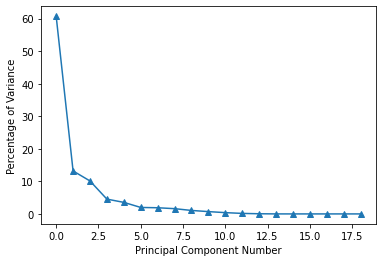

In [260]:
varPercentage = pca.explained_variance_ratio_*100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(19), varPercentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

#### Use  r = 6  components as features to transform the data into a reduced dimension space.

In [261]:
r = 6
scaled_data_trans_reduced = scaled_data_trans[:,:r]
scaled_data_trans_reduced

array([[-0.69,  0.53,  0.25, -0.2 , -0.08,  0.05],
       [-0.67,  0.51,  0.34, -0.17, -0.04,  0.06],
       [-0.71,  0.77, -0.16, -0.01, -0.17,  0.04],
       [-0.73,  0.51,  0.5 , -0.06, -0.14,  0.03],
       [-0.64,  0.53,  0.3 , -0.18, -0.02,  0.05],
       ...,
       [-0.5 , -0.26,  0.27,  0.11, -0.01, -0.01],
       [-0.5 , -0.26,  0.38,  0.15,  0.03, -0.2 ],
       [-0.51, -0.13, -0.08,  0.1 , -0.03, -0.03],
       [-0.48, -0.09, -0.16,  0.11,  0.  , -0.  ],
       [-0.44, -0.11, -0.05,  0.15,  0.02, -0.21]])

### Problem 1e 

#### Perform Kmeans again, but this time on the lower dimensional transformed data

In [262]:
kmeans = KMeans(n_clusters=4, max_iter=500, verbose=1)
kmeans.fit(scaled_data_trans_reduced)
clusters1 = kmeans.predict(scaled_data_trans_reduced)

Initialization complete
Iteration 0, inertia 678.9614721888713
Iteration 1, inertia 392.9372182367972
Iteration 2, inertia 391.3394910398803
Iteration 3, inertia 391.1705877623249
Iteration 4, inertia 391.1274082527841
Iteration 5, inertia 391.1141139368342
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 718.5226499406358
Iteration 1, inertia 440.8614185944933
Iteration 2, inertia 396.1281589649079
Iteration 3, inertia 391.1947338168538
Iteration 4, inertia 391.1193369281902
Converged at iteration 4: center shift 9.153157739825367e-07 within tolerance 1.2368605677310737e-05.
Initialization complete
Iteration 0, inertia 607.5243177720379
Iteration 1, inertia 402.6698640127255
Iteration 2, inertia 392.1532969679496
Iteration 3, inertia 391.21250890973977
Iteration 4, inertia 391.1249230793243
Iteration 5, inertia 391.1131249123458
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 686.8258794858682
Iterati

In [263]:
silhouettes1 = metrics.silhouette_samples(scaled_data_trans_reduced, clusters1)
silhouettes1

array([0.57, 0.56, 0.54, 0.52, 0.58, ..., 0.44, 0.37, 0.46, 0.41, 0.37])

#### Compare Silhouette values as well as completeness and Homogeneity values of the new clusters

In [264]:
print("New Clusters")
m1 = silhouettes1.mean()
print("Mean Silhouette Score: " + str(m1))
c1 = completeness_score(y,clusters1)
print("Completeness Score: " + str(c1))
h1 = homogeneity_score(y,clusters1)
print("Homogeneity Score: " + str(h1))
print()
print("Old Clusters:")
m = silhouettes.mean()
print("Mean Silhouette Score: " + str(m))
c = completeness_score(y,clusters)
print("Completeness Score: " + str(c))
h = homogeneity_score(y,clusters)
print("Homogeneity Score: " + str(h))

New Clusters
Mean Silhouette Score: 0.41760799731328
Completeness Score: 0.8439038482490108
Homogeneity Score: 0.5615373601726689

Old Clusters:
Mean Silhouette Score: 0.38160981543092376
Completeness Score: 0.8399857755070812
Homogeneity Score: 0.5594575369803793


#### The New Cluster mean silhouette score is slightly higher. Because this value is closest to +1 than the full data set is indicating that the sample is far away from the neighboring cluster, so the sample is least likely to be assigned to the wrong cluster. Additionally the completeness scores and homogeneity scores are slightly higher. This is indicating that reducted dimensional representation clustering is performing better. 

### Problem 2a

For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):

#### Load in the joke ratings data and the joke text data into appropriate data structures

In [285]:
def load_data(file):
    dataMat = np.genfromtxt(file,delimiter=',')
    dataMat = np.mat(dataMat)
    return dataMat

def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

jokes = load_jokes('jokes.csv')
dataMat = load_data('modified_jester_data.csv')


In [272]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

#### Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Pearson Similiary and Cosine Similarity recommended the first four same jokes with the last joke being different. Pearson similarity had a higher predicted rating across all 5 jokes.

In [273]:
user = 4
recommendations_cs = recommend(dataMat, user, N=5, simMeas=cosineSim, estMethod=standEst)
print("Cosine Similarity:")
print("Recommended Items for User", user)
for i, p in recommendations_cs:
    print("Item ", i, "with predicted rating: ", p)

print()
recommendations_p = recommend(dataMat, user, N=5, simMeas=pearsonSim, estMethod=standEst)
print("Pearson Similarity:")
print("Recommended Items for User", user)
for i, p in recommendations_p:
    print("Item ", i, "with predicted rating: ", p)

Cosine Similarity:
Recommended Items for User 4
Item  71 with predicted rating:  14.293754381681563
Item  75 with predicted rating:  14.293605672411005
Item  79 with predicted rating:  14.293063319114747
Item  78 with predicted rating:  14.2908339103558
Item  70 with predicted rating:  14.287092374768891

Pearson Similarity:
Recommended Items for User 4
Item  71 with predicted rating:  14.413443009309447
Item  75 with predicted rating:  14.397311198445264
Item  79 with predicted rating:  14.382511887413443
Item  78 with predicted rating:  14.356160763938075
Item  72 with predicted rating:  14.334361485417928


#### Top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version. Standard Estimator had a slightly higher predicted rating. Both recommenders predicted 99 and 71, while the rest were different. 

In [276]:
user = 25
recommendations_standEst = recommend(dataMat, user, N=5, simMeas=pearsonSim, estMethod=standEst)
print("Standard Estimator")
print("Recommended Items for User", user)
for i, p in recommendations_standEst:
    print("Item ", i, "with predicted rating: ", p)

print()
recommendations_svdEst = recommend(dataMat, user, N=5, simMeas=pearsonSim, estMethod=svdEst)
print("SVD Estimator")
print("Recommended Items for User", user)
for i, p in recommendations_svdEst:
    print("Item ", i, "with predicted rating: ", p)


Standard Estimator
Recommended Items for User 25
Item  99 with predicted rating:  15.324673571007686
Item  71 with predicted rating:  15.324296950553675
Item  97 with predicted rating:  15.322105340570541
Item  82 with predicted rating:  15.301730225022272
Item  91 with predicted rating:  15.294030630051065

SVD Estimator
Recommended Items for User 25
Item  3 with predicted rating:  15.27708815474947
Item  79 with predicted rating:  15.238062599769165
Item  72 with predicted rating:  15.209188661833458
Item  71 with predicted rating:  15.18502140590189
Item  99 with predicted rating:  15.18056079973231


### Problem 2b

#### Complete the definition for the function test

In [291]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    #Compute absolute error for user u over all test items
    for item in withheld_items:
    # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u
    
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    totalError = 0.0
    totalTestCases = 0.0
    num_users = np.shape(dataMat)[0]
    for user in range(num_users):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod)
        totalError += error_u
        totalTestCases += count_u
    MAE = totalError/totalTestCases
    return MAE

#### Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function. 

In [293]:
MAE_std = test(dataMat, 0.2, standEst, pearsonSim)
print("standEst MAE: " + str(MAE_std))
print()
MAE_svd = test(dataMat, 0.2, svdEst, pearsonSim)
print("svdEst MAE: " + str(MAE_svd))

standEst MAE: 3.6945193735965827

svdEst MAE: 3.6367251892336414


### Problem 2c

#### New function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke.

In [299]:
def knn_search(dataMat, queryJoke, k, simMeas=pearsonSim):
    num_jokes = np.shape(dataMat)[1]
    dlist = []
    for j in range(num_jokes):
        dist = simMeas(dataMat[queryJoke].T,dataMat[j].T)
        indx=[dist,j]
        dlist.append(indx)
    dlist.sort() # sorting
    # return the indexes of K nearest neighbors
    return dlist[:k]

def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric):
    print("Selected Joke: Joke # "+ str(queryJoke))
    print(jokes[queryJoke]) 
    l = knn_search(dataMat, queryJoke,k, metric) 
    print("\nRecommended Jokes: ")  
    for i in range(len(l)):
        print("Joke #" + str(l[i][1]) + " (Similarity: "+ str(l[i][0]) + ")")
        print(jokes[l[i][1]])
        print()   

#### Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.

In [300]:
print_most_similar_jokes(dataMat,jokes,9,3,pearsonSim)

Selected Joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you?

Recommended Jokes: 
Joke #23 (Similarity: 0.2919129781661205)
What do you get when you run over a parakeet with a lawnmower? Shredded tweet.

Joke #76 (Similarity: 0.36747606736856375)
If pro- is the opposite of con- then congress must be the opposite of progress.

Joke #78 (Similarity: 0.37913627056413823)
Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40.



#### Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [301]:
print_most_similar_jokes(dataMat,jokes,9,3,cosineSim)

Selected Joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you?

Recommended Jokes: 
Joke #97 (Similarity: 0.7842561487098592)
Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

Joke #68 (Similarity: 0.8025376286362309)
This guys wife asks "Honey if I died would you remarry?" and he replies "Well after a considerable period of grieving we all need companionship I guess I would."She then asks "If I died and you remarried would she live in this house?" and he replies "We've spent a lot of time and money getting t

### Problem 2D

#### I wasn't sure how to approach this problem and ran out of time. 